###### <img src="./logo_UTN.svg" align="right" width="150" /> 

### Procesamiento Digital de Señales

## Trabajo Práctico Nº6 - "Estimación espectral. Ventanas en acción!"

### Gabriel Cruz

## Enunciado

### 3) Genere la siguiente señal

\begin{equation}
x(k)=a0⋅sen(Ω1⋅k)
\end{equation}

siendo
\begin{equation}
a0=2
Ω1=Ω0+fr⋅2πN
Ω0=π2
\end{equation}

y la variable aleatoria definida por la siguiente distribución de probabilidad

\begin{equation}
fr∼U(−2,2)
\end{equation}



Considere 200 realizaciones (muestras tomadas de fr) para cada ventana analizada en la TS6. Se pide entonces:

### 3.a) Grafique los histogramas de

\begin{equation}
|Xiw(Ω0)|
\end{equation}

siendo


\begin{equation}
|Xiw(Ω)|=|F{x(k)⋅wi(k)}|
\end{equation}

para la i-ésima ventana. El sesgo y la varianza se definen para este caso como:

Grafique los 3 histogramas juntos, o cuide que todos los gráficos tengan el mismo rango de valores en X para facilitar la comparación visual.
 
### 3.b) Calcule experimentalmente el sesgo y la varianza del siguiente estimador:

\begin{equation}
\hat{a_0}=|Xiw(Ω0)|
\end{equation}

siendo

\begin{equation}
sa=E{\hat{a_0}}−a0
\end{equation}


\begin{equation}
va = var\{\hat{a_0}\} = E{(\hat{a_0}−E{\hat{a_0}})^2}
\end{equation}

y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales


\begin{equation}
E{\hat{a_0}}=\hat{μ_a}=\frac{1}{M} \sum_{j=0}^{M-1}\hat{a_j}
\end{equation}


\begin{equation}
sa=\hat{μ_a} − a_0
\end{equation}



\begin{equation}
va=\frac{1}{M} \sum_{j=0}^{M-1} (\hat{a_j} − \hat{μ_a})^2
\end{equation}

Elegir 3 ventanas de las 5 que figuran a continuación:

### Estimadores de Amplitud
- Rectangular
- Bartlet
- Hann
- Black
- Flattop

Bonus:

Visualizar los 3 histogramas juntos

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift
from IPython.display import display, Markdown
import pandas as pd
#%% Generador de señales senoidales

def     mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = 1000, fs = 1000):
    
    w = 2 * np.pi * ff
    tt = np.arange(0, nn/fs, 1/fs)
    xx = dc + vmax * np.sin(tt * w + ph )
    return tt,xx

In [64]:
#%% Datos generales de la simulación

fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
 
# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling
 
# Datos del ADC
B = 4 # bits
Vf = 2 # Volts
q = Vf/(2**(B-1)) # Volts
 
# datos del ruido
kn = 1/10  # 10 dB
pot_ruido = (q**2)/12 * kn # Watts (potencia de la señal 1 W)

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral
fo = N/4 # pi/2
vmax = 2 #Amplitud de la senoidal
R= 200 #realizaciones

In [65]:
#%% Creacion de 200 senoidales + ruido

fr = np.random.uniform(-2, 2, 200) # Variable aleatoria

fr_ruido = fr * 2 * np.pi/N

#Creo una matrix con todos ceros
matrix = np.zeros((N,R))

#Realizo la carga en la matriz
for i in range(R):
#Genero una senoidal
    tt, analog_sig = mi_funcion_sen(vmax=vmax, ff=fo+fr_ruido[i], nn=N, fs=fs)
    matrix[:,i]= analog_sig


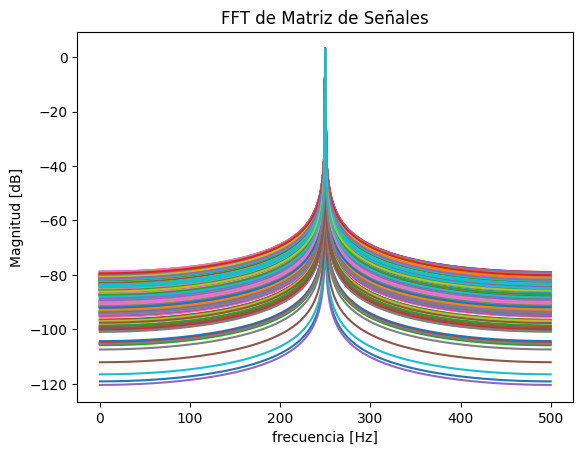

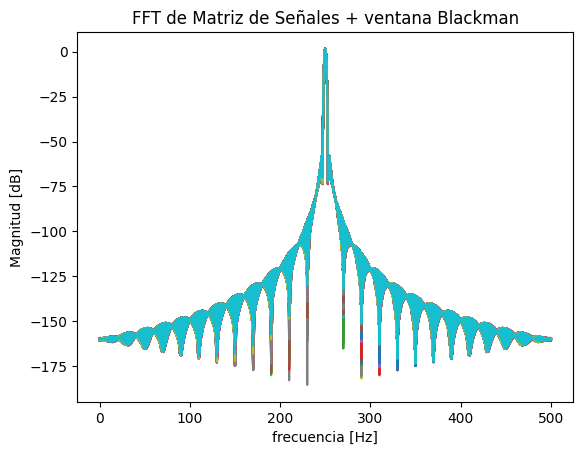

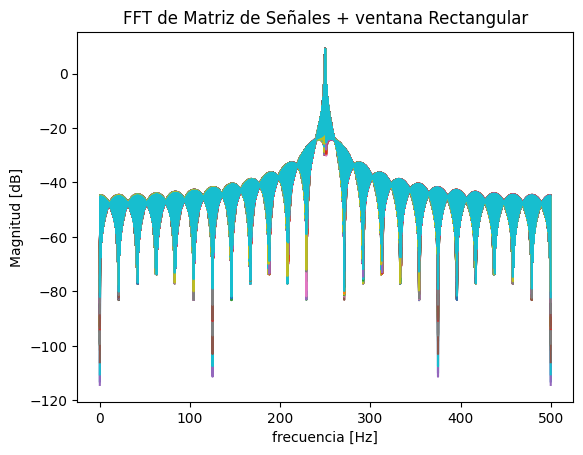

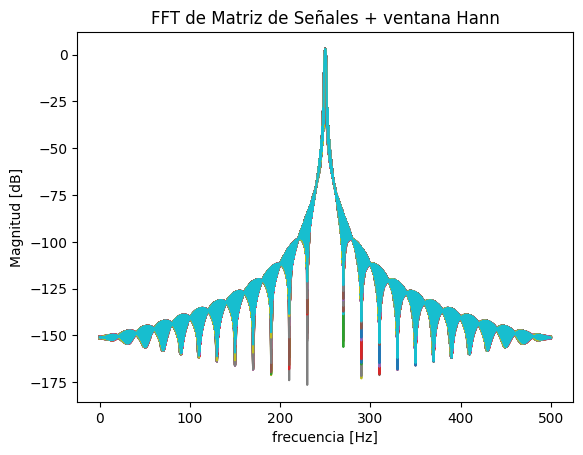

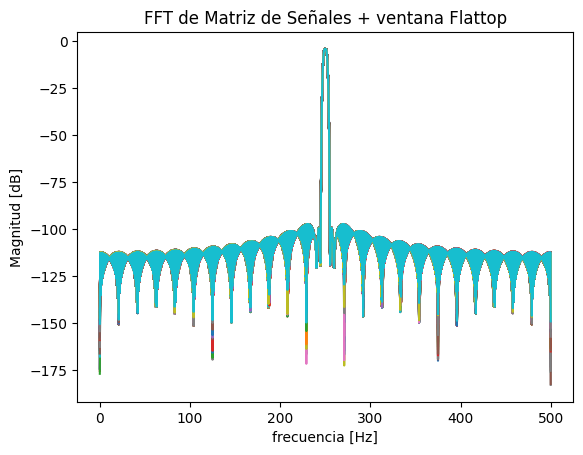

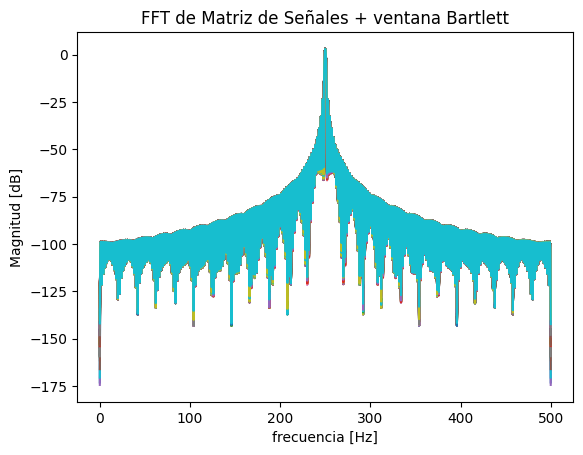

In [66]:
#%% Ventana Blackman

window_Blackman = signal.windows.blackman(N)

"""Realizo el producto entre la matriz y la ventana Blackman"""
matrix_Blackman = matrix * window_Blackman[:, np.newaxis]

#%% Ventana Rectangular

window_Rect = signal.windows.boxcar(N)

"""Realizo el producto entre la matriz y la ventana Rectangular"""
matrix_Rect = matrix * window_Rect[:, np.newaxis]

#%% Ventana Hann

window_Hann = signal.windows.hann(N)

"""Realizo el producto entre la matriz y la ventana Rectangular"""
matrix_Hann = matrix * window_Hann[:, np.newaxis]


#%% Ventana Flattop

window_Flat = signal.windows.flattop(N)

"""Realizo el producto entre la matriz y la ventana Rectangular"""
matrix_Flat = matrix * window_Flat[:, np.newaxis]

#%% Ventana Bartlett

window_Bartlett = signal.windows.bartlett(N)
"""Realizo el producto entre la matriz y la ventana Bartlett"""
matrix_Bartlett = matrix * window_Bartlett[:, np.newaxis]

#%% Obtencion de FFT
#Filtrado de frecuencia Nyquist
ff = np.arange(0,fs,df)
bfrec = ff <= fs/2 

ft_matrix = np.fft.fft(matrix,axis =0)/N 

plt.figure(2)
plt.plot(ff[bfrec], 10* np.log10(2 * np.abs(ft_matrix[bfrec])**2))
plt.title('FFT de Matriz de Señales')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.show()

"""FFT del producto de la señal y ventanta"""

# FFT con ventana y padding
df_padded = fs / 2048
ff_padded = np.arange(0, fs, df_padded)
bfrec_padded = ff_padded <= fs / 2

ft_matrix_Blackman = fft(matrix_Blackman, 2048, axis=0) / (len(window_Blackman) / 2.0)

plt.figure(3)
plt.plot(ff_padded[bfrec_padded], 10 * np.log10(2 * np.abs(ft_matrix_Blackman[bfrec_padded, :])**2))
plt.title('FFT de Matriz de Señales + ventana Blackman')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.show()

"""FFT del producto de la señal y ventanta"""

# FFT con ventana y padding

ft_matrix_Rect = fft(matrix_Rect, 2048, axis=0) / (len(window_Rect) / 2.0)

plt.figure(4)
plt.plot(ff_padded[bfrec_padded], 10 * np.log10(2 * np.abs(ft_matrix_Rect[bfrec_padded, :])**2))
plt.title('FFT de Matriz de Señales + ventana Rectangular')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.show()

"""FFT del producto de la señal y ventanta"""

# FFT con ventana y padding

ft_matrix_Hann = fft(matrix_Hann, 2048, axis=0) / (len(window_Hann) / 2.0)

plt.figure(5)
plt.plot(ff_padded[bfrec_padded], 10 * np.log10(2 * np.abs(ft_matrix_Hann[bfrec_padded, :])**2))
plt.title('FFT de Matriz de Señales + ventana Hann')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.show()

ft_matrix_Flat = fft(matrix_Flat, 2048, axis=0) / (len(window_Flat) / 2.0)

plt.figure(6)
plt.plot(ff_padded[bfrec_padded], 10 * np.log10(2 * np.abs(ft_matrix_Flat[bfrec_padded, :])**2))
plt.title('FFT de Matriz de Señales + ventana Flattop')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.show()

ft_matrix_Bartlett = fft(matrix_Bartlett, 2048, axis=0) / (len(window_Bartlett) / 2.0)

plt.figure(7)
plt.plot(ff_padded[bfrec_padded], 10 * np.log10(2 * np.abs(ft_matrix_Bartlett[bfrec_padded, :])**2))
plt.title('FFT de Matriz de Señales + ventana Bartlett')
plt.xlabel('frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.show()


En los graficos de arriba podemos ver los espectros de las distintas ventanas convolucionada con la señal original.
Se puede observar los distintos ancho de banda y la atenuacion de los lobulos laterales respecto al lobulo principal de cada uno de las ventanas.

## 3.a) Grafique los histogramas de 3 ventanas

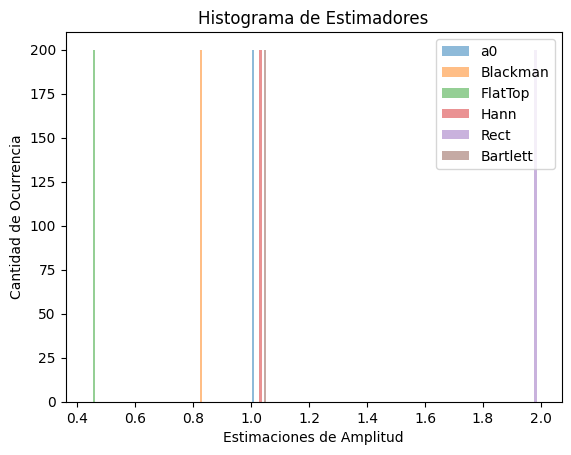

In [67]:
a0 = np.abs(ft_matrix[N//4, :])

Indice_padding = 2048* N//4 //1000

a0_Blackman = np.abs(ft_matrix_Blackman[Indice_padding, :])

a0_Rect = np.abs(ft_matrix_Rect[Indice_padding, :])

a0_Hann = np.abs(ft_matrix_Hann[Indice_padding, :])

a0_Flat = np.abs(ft_matrix_Flat[Indice_padding, :])

a0_Bartlett = np.abs(ft_matrix_Bartlett[Indice_padding, :])

plt.figure(11)
plt.hist([a0,a0_Blackman,a0_Flat,a0_Hann,a0_Rect,a0_Bartlett], bins=25, alpha=0.5, label = ['a0','Blackman','FlatTop','Hann','Rect','Bartlett'])
plt.title("Histograma de Estimadores")
plt.xlabel('Estimaciones de Amplitud')
plt.ylabel('Cantidad de Ocurrencia')
plt.legend(loc='upper right')
plt.show()

En el histograma de arriba se puede observar las distintas estimaciones realizadas por las distintas ventanas. No se logro una mejor viasualizacion con todos los histogramas juntas.

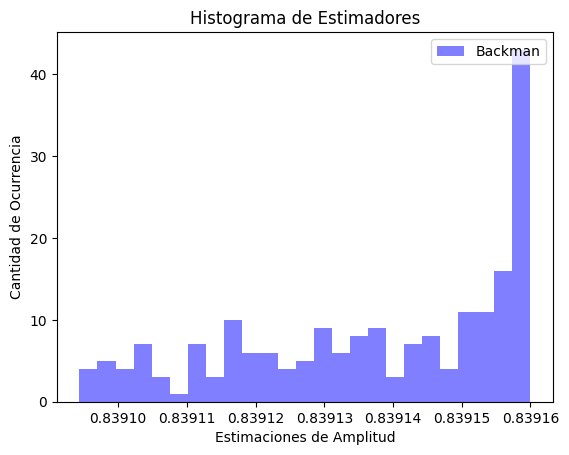

In [68]:
plt.figure(12)
plt.hist(a0_Blackman, bins=25, alpha=0.5, label = 'Backman',color = 'blue')
plt.title("Histograma de Estimadores")
plt.xlabel('Estimaciones de Amplitud')
plt.ylabel('Cantidad de Ocurrencia')
plt.legend(loc='upper right')
plt.show()

En el histograma de arriba se puede observar la distribucion de la ventanda Backman con mayor precision, tiene una distribucion expotencial creciente. 

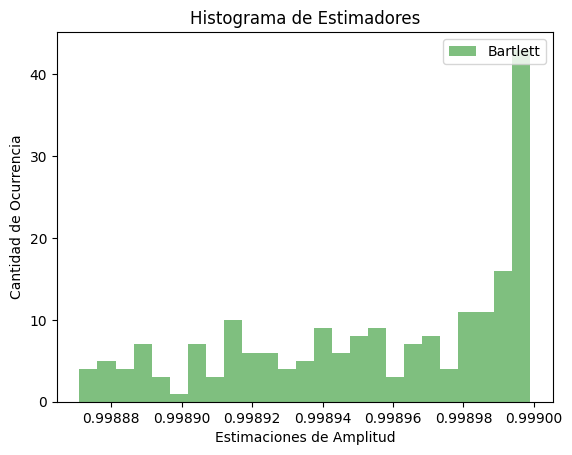

In [69]:
plt.figure(13)
plt.hist(a0_Bartlett, bins=25, alpha=0.5, label = 'Bartlett',color = 'green')
plt.title("Histograma de Estimadores")
plt.xlabel('Estimaciones de Amplitud')
plt.ylabel('Cantidad de Ocurrencia')
plt.legend(loc='upper right')
plt.show()

En el histograma de arriba se puede observar la distribucion de la ventanda Bartlett con mayor precision, tiene una distribucion expotencial creciente al igual que la ventana anterior.

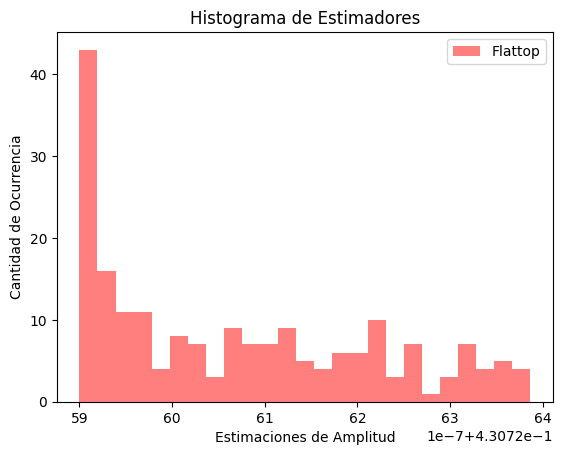

In [70]:
plt.figure(14)
plt.hist(a0_Flat, bins=25, alpha=0.5, label = 'Flattop',color = 'red')
plt.title("Histograma de Estimadores")
plt.xlabel('Estimaciones de Amplitud')
plt.ylabel('Cantidad de Ocurrencia')
plt.legend(loc='upper right')
plt.show()

En el histograma de arriba se puede observar la distribucion de la ventanda Flattop con mayor precision, tiene una distribucion expotencial decreciente.
Este histograma esta desplazado pero mantiene la forma de la distribucion, no encontre una solucion al problema del desplazamiento pero en explorador de variables tiene valores cercanos a 0.431. 

## 3.b) Calcule experimentalmente el sesgo y la varianza del siguiente estimador:

In [71]:
"""Para estimador a0"""
"""Calculo de Sesgo"""
M = R

E_a0 = (1/M) * np.sum(a0) # 1/M sumatoria de a^j

Sa_a0 = np.abs(E_a0 - vmax)   # Vmax = a0 = 2 

"""Calculo de Varianza"""

Va_a0 = (1/M) * np.sum((a0 - E_a0)**2)


"""Para estimador Blackman"""

E_Blackman = (1/M) * np.sum(a0_Blackman) 

Sa_Blackman = np.abs(E_Blackman - vmax)    

Va_Blackman = (1/M) * np.sum((a0_Blackman - E_Blackman)**2)

"""Para estimador Rectangular"""

E_Rect = (1/M) * np.sum(a0_Rect) 

Sa_Rect = np.abs(E_Rect - vmax)   

Va_Rect = (1/M) * np.sum((a0_Rect - E_Rect)**2)

"""Para estimador Hann"""

E_Hann = (1/M) * np.sum(a0_Hann) 

Sa_Hann = np.abs(E_Hann - vmax)   

Va_Hann = (1/M) * np.sum((a0_Hann - E_Hann)**2)

"""Para estimador Flattop"""

E_Flat = (1/M) * np.sum(a0_Flat) 

Sa_Flat = np.abs(E_Flat - vmax)   

Va_Flat = (1/M) * np.sum((a0_Flat - E_Flat)**2)

"""Para estimador Bartlett"""

E_Bartlett = (1/M) * np.sum(a0_Bartlett) 

Sa_Bartlett = np.abs(E_Bartlett - vmax)   

Va_Bartlett = (1/M) * np.sum((a0_Bartlett - E_Bartlett)**2)

In [72]:
data = {
    'Ventanas': ['a0', 'Backman', 'Rectangular','Hann','Flattop','Bartlett'],
    'Sa': [Sa_a0, Sa_Blackman, Sa_Rect,Sa_Hann,Sa_Flat,Sa_Bartlett],
    'va': [Va_a0, Va_Blackman, Va_Rect,Va_Hann,Va_Flat,Va_Bartlett]
}
df = pd.DataFrame(data)
display(Markdown("### Estimacion de Amplitud"))

display(df)

### Estimacion de Amplitud

,Ventanas,Sa,va
0,a0,1.000090,6.241715e-09
1,Backman,1.160863,3.982851e-10
2,Rectangular,0.000180,2.496686e-08
3,Hann,1.001035,9.313675e-10
4,Flattop,1.569274,2.190951e-14
5,Bartlett,1.001045,1.514517e-09


En la tabla de arriba podemos observar el sesgo y varianza de los distintos estimadores. Podemos destacar que todos los estimadores tienen un varianza tendiendo a cero, esto indica que los valores obtenidos son precisos pero no exactos. Estos estimadores al ser precisos se los puede corregir ya que tienen un error constante.